In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading files
df_sales = pd.read_csv('train.csv')
df_sales.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df_sales.shape

(1460, 81)

In [5]:
# showing  10 random rows
df_sales.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1167  1168          60       RL         58.0    10852   Pave   NaN      IR1   
256    257          60       FV         64.0     8791   Pave   NaN      IR1   
1145  1146          50       RM         52.0     6240   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
784    785          75       RM         35.0     6300   Pave  Grvl      Reg   
1286  1287          20       RL          NaN     9790   Pave   NaN      Reg   
729    730          30       RM         52.0     6240   Pave  Grvl      Reg   
1276  1277          60       RL          NaN    12936   Pave   NaN      IR1   
913    914          90       RH         82.0     6270   Pave   NaN      Reg   
416    417          60       RL         74.0     7844   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1167         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
256          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1145         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
76           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
784          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1286         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
729          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1276         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
913          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
416          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1167      2   2006        WD         Normal     173000  
256       5   2008        WD         Normal     207500  
1145      8   2006        WD         Family     149000  
76        4   2008        WD         Normal     135750  
784       6   2008        WD         Normal     128000  
1286      6   2010        WD         Normal     143000  
729       1   2009        WD         Normal     103000  
1276     12   2009        WD         Normal     162000  
913       8   2007        WD         Normal     145000  
416       3   2006        WD         Normal     149500  

[10 rows x 81 columns]

## Checking outliers in depedent variable

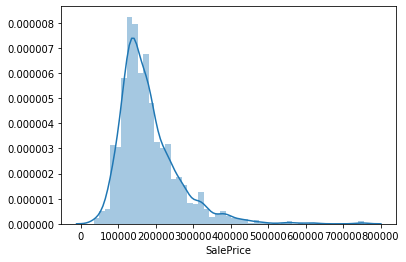

In [6]:
sns.distplot(df_sales['SalePrice'])

In [7]:
df_sales['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# using imperical rule of mean+3*std_dev() checking outlier points

In [97]:
df_sales['SalePrice'].mean()-3*df_sales['SalePrice'].std(),df_sales['SalePrice'].mean()+3*df_sales['SalePrice'].std(),

(-57406.31275824891, 419248.70453907084)

## log transformation of data

In [8]:
df_sales['SalePrice'] = df_sales['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

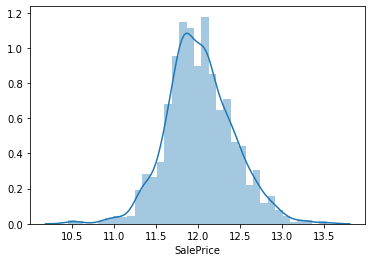

In [9]:
sns.distplot(df_sales['SalePrice'])

In [10]:
df_sales['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [11]:
df_sales.shape

(1460, 81)

In [12]:
df_sales.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247694  
1   2007        WD         Normal  12.109011  
2   2008        WD         Normal  12.317167  
3   2006        WD        Abnorml  11.849398  
4   2008        WD         Normal  12.429216  

[5 rows x 81 columns]

In [13]:
# checking information of data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df_sales.shape

(1460, 81)

In [15]:
# checking null values
pd.set_option('max_rows',81)
df_sales.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
# percentage of null values
df_sales.isnull().sum()/len(df_sales.index)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [110]:
# Drop the columns having null values greater the 30%
df_sales = df_sales.dropna(thresh = len(df_sales) * .70,axis=1)
df_sales.isnull().sum()/len(df_sales.index)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [111]:
# drop null values row wise
df_sales = df_sales.dropna(how='any',axis=0)
df_sales.shape

(1094, 76)

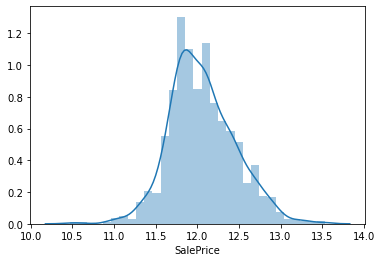

In [112]:
sns.distplot(df_sales['SalePrice'])

In [113]:
df_sales['SalePrice'].describe()

count    1094.000000
mean       12.057513
std         0.394847
min        10.471950
25%        11.794338
50%        12.018235
75%        12.305918
max        13.534473
Name: SalePrice, dtype: float64

In [114]:
df_sales.isnull().sum()/len(df_sales.index)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [115]:
pd.set_option('max_columns',78)
df_sales.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
300    301         190       RL         90.0    15750   Pave      Reg   
891    892          60       RL         70.0    11184   Pave      Reg   
391    392          60       RL         71.0    12209   Pave      IR1   
633    634          20       RL         80.0     9250   Pave      Reg   
1306  1307         120       RL         48.0     6955   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
300          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
891          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
391          Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
633          Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1306         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
300        Norm   2fmCon     1Story            5            5       1953   
891        Norm     1Fam     2Story            6            5       1978   
391        Norm     1Fam     2Story            6            5       2001   
633        Norm     1Fam     1Story            5            7       1954   
1306       Norm   TwnhsE     1Story            7            5       2005   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
300           1953       Hip  CompShg     MetalSd     MetalSd    BrkFace   
891           1978       Hip  CompShg     HdBoard     HdBoard    BrkFace   
391           2002     Gable  CompShg     VinylSd     VinylSd       None   
633           2005     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1306          2006     Gable  CompShg     VinylSd     VinylSd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
300         56.0        TA        TA     CBlock       TA       TA   
891         92.0        TA        TA     CBlock       TA       TA   
391          0.0        TA        TA      PConc       Ex       TA   
633          0.0        TA        TA     CBlock       TA       TA   
1306        94.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
300            Mn          BLQ         841          Unf           0   
891            No          LwQ         226          Rec         500   
391            No          ALQ         690          Unf           0   
633            No          BLQ         480          LwQ         468   
1306           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
300         324         1165    GasA        TA          Y      SBrkr   
891         192          918    GasA        Gd          Y      SBrkr   
391         114          804    GasA        Ex          Y      SBrkr   
633         108         1056    GasA        TA          Y      SBrkr   
1306       1368         1368    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
300       1336         0             0       1336             1             0   
891        918       765             0       1683             0             0   
391        804      1157             0       1961             1             0   
633       1056         0             0       1056             0             1   
1306      1368         0             0       1368             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
300          1         0             2             1          TA   
891          2         1             3             1          TA   
391          2         1             3             1          Gd   
633          1         0             3             1          TA   
1306         2         0             2             1          Gd   

      TotRmsAbvGrd Functional  Fireplac

In [118]:
# drop id column its jaust an index number
df_sales.drop('Id',axis=1,inplace=True)

In [119]:
df_sales.shape

(1094, 75)

In [120]:
#drop column having 1 unique value
df_sales=df_sales.drop(df_sales.columns[df_sales.apply(lambda col: col.nunique()==1)], axis=1)
df_sales.shape

(1094, 74)

In [121]:
# drop duplicates rows
df_sales = df_sales.drop_duplicates(keep='first')
df_sales.shape

(1094, 74)

# Performing EDA

In [122]:
df_cat = df_sales.select_dtypes('object')
df_cont = df_sales.select_dtypes(['int64','float64'])

In [134]:
df_cont.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247694  
1  12.109011  
2  12.317167  
3  11.849398  
4  12.429216

In [129]:
df_cat.shape,df_cont.shape

((1094, 37), (1094, 37))

In [123]:
# descriptive analysis
df_cont.describe().iloc[:,:5]

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond
count  1094.000000  1094.000000    1094.000000  1094.000000  1094.000000
mean     56.128885    70.759598   10132.346435     6.247715     5.575868
std      41.976345    24.508859    8212.249621     1.366797     1.066500
min      20.000000    21.000000    1300.000000     2.000000     2.000000
25%      20.000000    60.000000    7606.750000     5.000000     5.000000
50%      50.000000    70.000000    9444.500000     6.000000     5.000000
75%      70.000000    80.000000   11387.250000     7.000000     6.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000

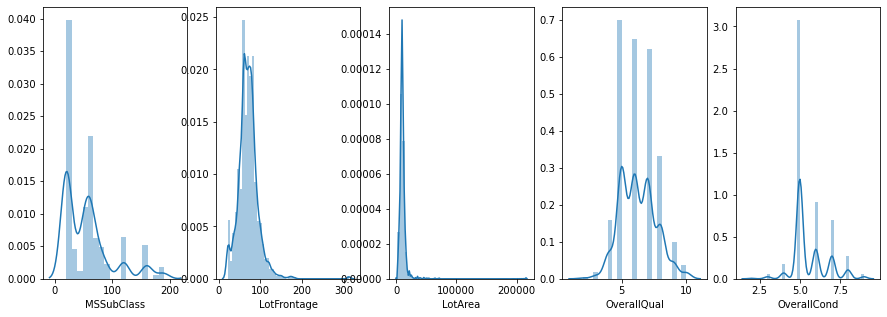

In [124]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

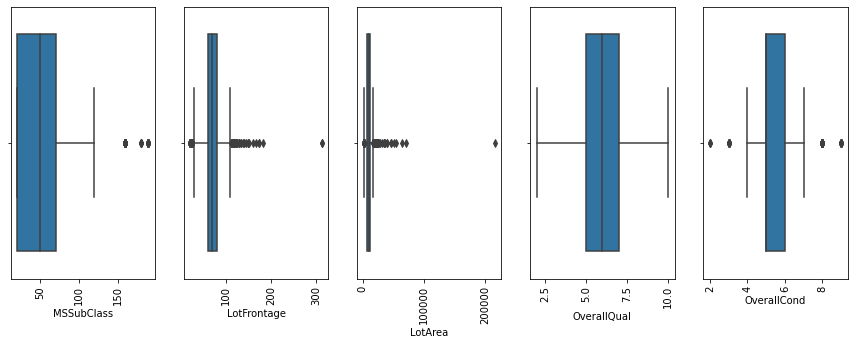

In [125]:
plt.figure(figsize=(15,5))

for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=90)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [126]:
df_cont.describe().iloc[:,5:10]

YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2
count  1094.000000   1094.000000  1094.000000  1094.000000  1094.000000
mean   1972.412249   1985.915905   109.855576   448.191956    45.252285
std      31.189752     20.930772   190.667459   468.728095   159.075003
min    1880.000000   1950.000000     0.000000     0.000000     0.000000
25%    1953.000000   1967.000000     0.000000     0.000000     0.000000
50%    1975.000000   1995.000000     0.000000   384.500000     0.000000
75%    2003.000000   2005.000000   171.750000   712.750000     0.000000
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000

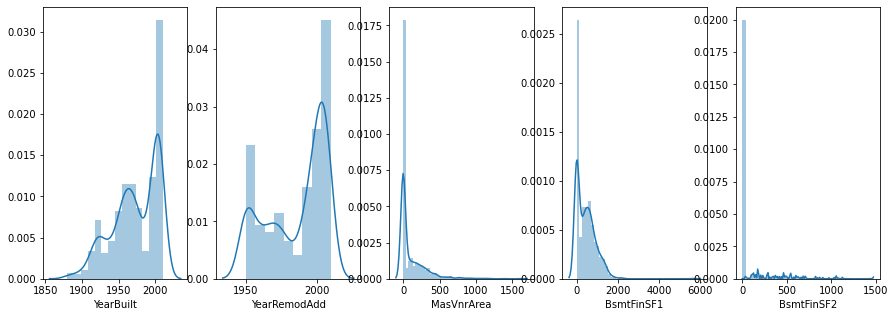

In [131]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

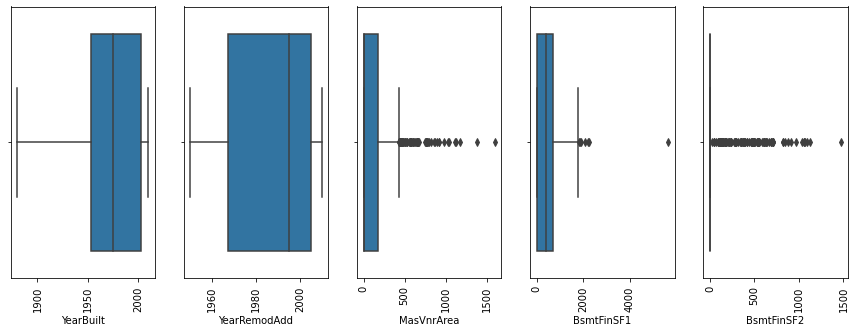

In [132]:
plt.figure(figsize=(15,5))

for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=90)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [130]:
df_cont.describe().iloc[:,10:15]

BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF
count  1094.000000  1094.000000  1094.000000  1094.000000   1094.000000
mean    606.117002  1099.561243  1173.809872   356.536563      4.680987
std     445.834636   415.851262   387.677463   439.260130     42.099821
min       0.000000   105.000000   438.000000     0.000000      0.000000
25%     270.000000   816.000000   894.000000     0.000000      0.000000
50%     525.000000  1023.000000  1097.000000     0.000000      0.000000
75%     846.000000  1345.500000  1413.500000   729.000000      0.000000
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000

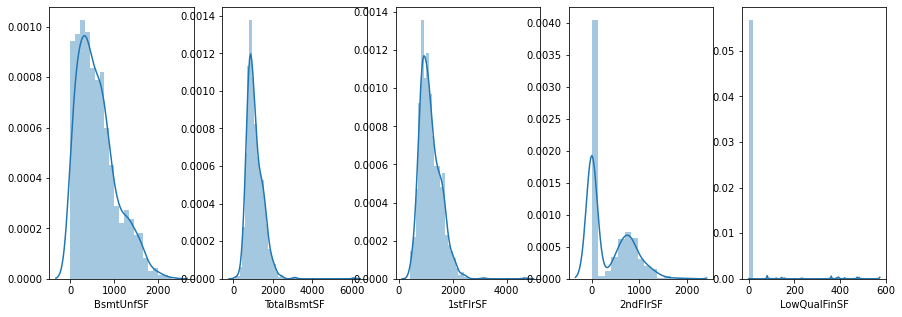

In [141]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

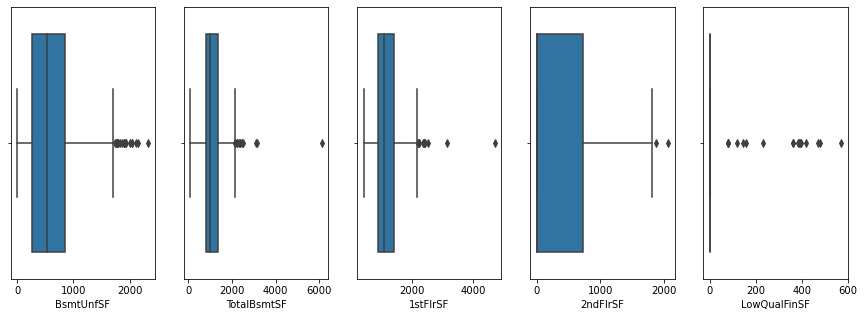

In [142]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [143]:
df_cont.describe().iloc[:,15:20]

GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath
count  1094.000000   1094.000000   1094.000000  1094.000000  1094.000000
mean   1535.027422      0.423218      0.056673     1.577697     0.389397
std     526.124028      0.514253      0.235244     0.550219     0.500793
min     438.000000      0.000000      0.000000     0.000000     0.000000
25%    1164.000000      0.000000      0.000000     1.000000     0.000000
50%    1480.000000      0.000000      0.000000     2.000000     0.000000
75%    1779.000000      1.000000      0.000000     2.000000     1.000000
max    5642.000000      2.000000      2.000000     3.000000     2.000000

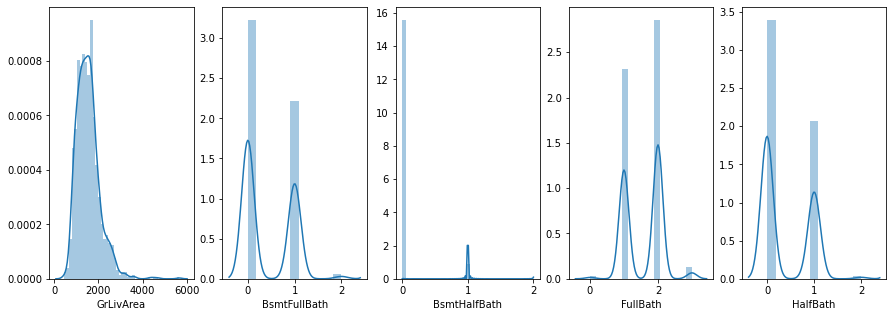

In [144]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

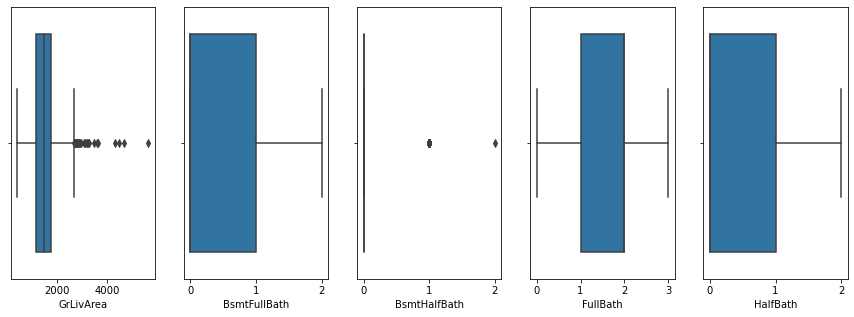

In [145]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [146]:
df_cont.describe().iloc[:,20:25]

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt
count   1094.000000   1094.000000   1094.000000  1094.000000  1094.000000
mean       2.861974      1.033821      6.570384     0.610603  1978.565814
std        0.764107      0.185841      1.584486     0.633118    25.934444
min        0.000000      1.000000      3.000000     0.000000  1900.000000
25%        2.000000      1.000000      5.000000     0.000000  1960.000000
50%        3.000000      1.000000      6.000000     1.000000  1982.000000
75%        3.000000      1.000000      7.000000     1.000000  2003.000000
max        6.000000      3.000000     12.000000     3.000000  2010.000000

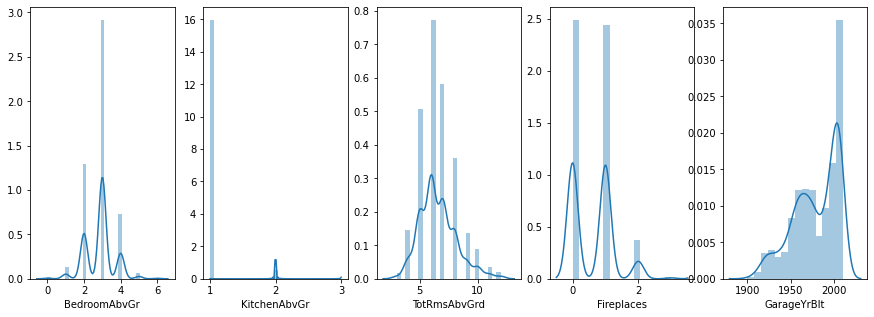

In [147]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

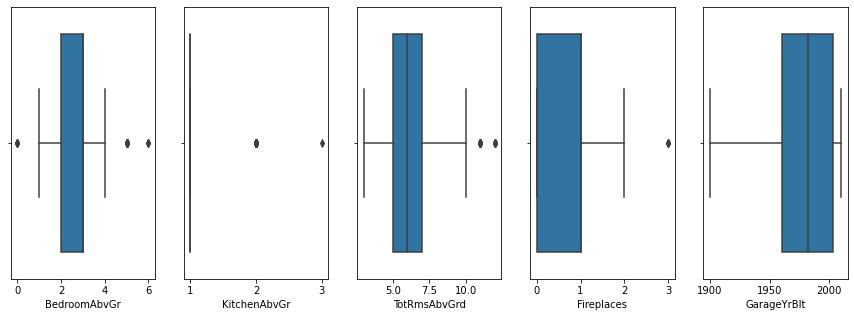

In [148]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [150]:
df_cont.describe().iloc[:,25:30]

GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch
count  1094.000000  1094.000000  1094.000000  1094.000000    1094.000000
mean      1.879342   503.760512    94.341865    46.946984      22.053016
std       0.658586   192.261314   122.624615    64.820019      61.570502
min       1.000000   160.000000     0.000000     0.000000       0.000000
25%       1.000000   360.000000     0.000000     0.000000       0.000000
50%       2.000000   484.000000     0.000000    28.000000       0.000000
75%       2.000000   602.500000   169.750000    68.000000       0.000000
max       4.000000  1418.000000   857.000000   547.000000     552.000000

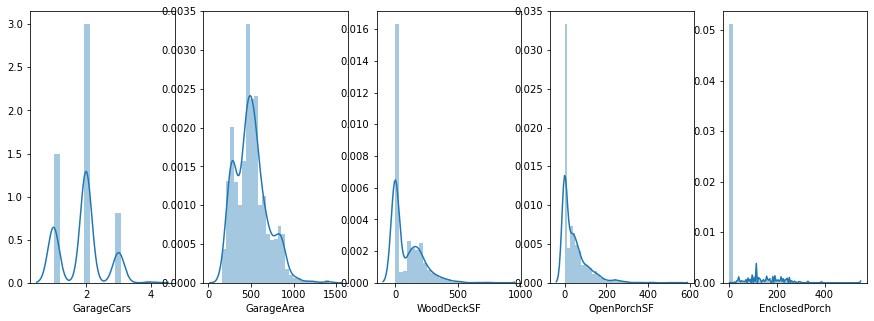

In [151]:
plt.figure(figsize=(15,5))
for i in range(25,30):
    plt.subplot(1, 5, i-24)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

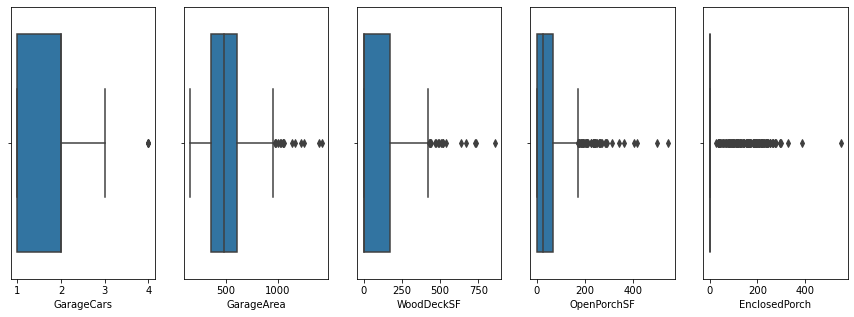

In [152]:
plt.figure(figsize=(15,5))
for i in range(25,30):
    plt.subplot(1, 5, i-24)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [153]:
df_cont.describe().iloc[:,30:35]

3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold
count  1094.000000  1094.000000  1094.000000  1094.000000  1094.000000
mean      3.266910    16.498172     3.007313    23.550274     6.335466
std      29.655973    58.455303    40.713175   167.135237     2.694558
min       0.000000     0.000000     0.000000     0.000000     1.000000
25%       0.000000     0.000000     0.000000     0.000000     5.000000
50%       0.000000     0.000000     0.000000     0.000000     6.000000
75%       0.000000     0.000000     0.000000     0.000000     8.000000
max     508.000000   480.000000   648.000000  2500.000000    12.000000

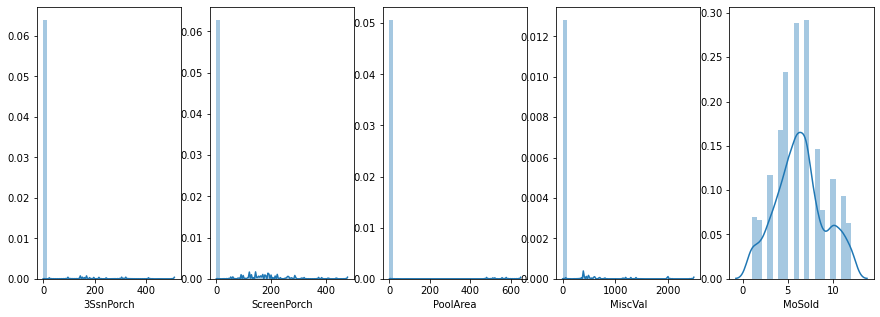

In [154]:
plt.figure(figsize=(15,5))
for i in range(30,35):
    plt.subplot(1, 5, i-29)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

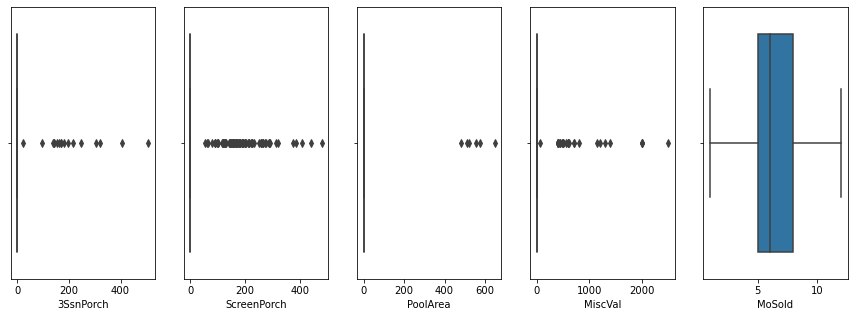

In [155]:
plt.figure(figsize=(15,5))
for i in range(30,35):
    plt.subplot(1, 5, i-29)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

In [156]:
df_cont.describe().iloc[:,35:]

YrSold    SalePrice
count  1094.000000  1094.000000
mean   2007.786106    12.057513
std       1.334307     0.394847
min    2006.000000    10.471950
25%    2007.000000    11.794338
50%    2008.000000    12.018235
75%    2009.000000    12.305918
max    2010.000000    13.534473

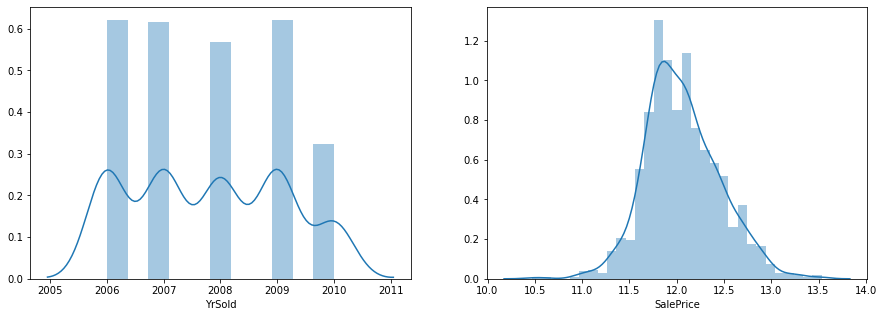

In [159]:
plt.figure(figsize=(15,5))
for i in range(35,37):
    plt.subplot(1, 2, i-34)
    plt.xticks(rotation=0)
    sns.distplot(df_sales[df_cont.columns[i]])

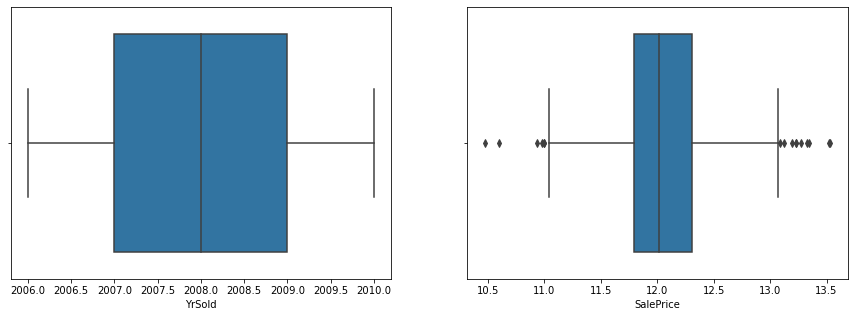

In [158]:
plt.figure(figsize=(15,5))
for i in range(35,37):
    plt.subplot(1, 2, i-34)
    plt.xticks(rotation=0)
    sns.boxplot(df_sales[df_cont.columns[i]])

# Univariate of categorical features

In [163]:
df_cat.describe().iloc[:3]

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
count      1094   1094     1094        1094      1094      1094         1094   
unique        5      2        4           4         5         3           25   
top          RL   Pave      Reg         Lvl    Inside       Gtl        NAmes   

       Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
count        1094       1094     1094       1094      1094     1094   
unique          9          6        5          8         5        7   
top          Norm       Norm     1Fam     1Story     Gable  CompShg   

       Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
count         1094        1094       1094      1094      1094       1094   
unique          14          16          4         4         4          5   
top        VinylSd     VinylSd       None        TA        TA      PConc   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1094     1094         1094         1094         1094    1094   
unique        4        4            4            6            6       4   
top          TA       TA           No          Unf          Unf    GasA   

       HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
count       1094       1094       1094        1094       1094       1094   
unique         5          2          5           4          6          6   
top           Ex          Y      SBrkr          TA        Typ     Attchd   

       GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
count          1094       1094       1094       1094     1094          1094  
unique            3          5          5          3        9             6  
top             Unf         TA         TA          Y       WD        Normal

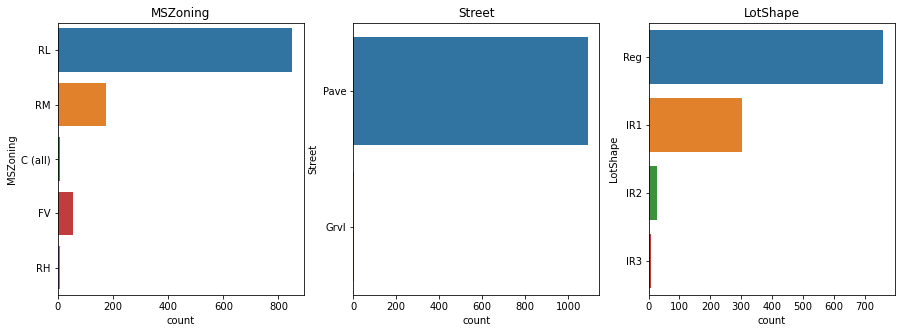

In [161]:
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

In [166]:
df_cat.describe().iloc[3:6]

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
freq      850   1090      760         991       830      1045          173   

     Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
freq        950       1082      925        540       843     1078         421   

     Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
freq         412        639       646       973        518      486     1006   

     BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
freq          734          343          972    1075       594       1036   

     Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
freq       1009         528       1024        680          485       1031   

     GarageCond PavedDrive SaleType SaleCondition  
freq       1050       1023      928           880

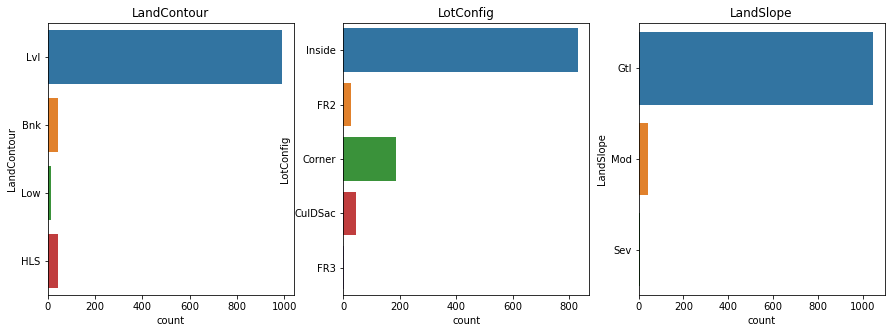

In [162]:
plt.figure(figsize=(15,5))
for i in range(3,6):
    plt.subplot(1, 3, i-2)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

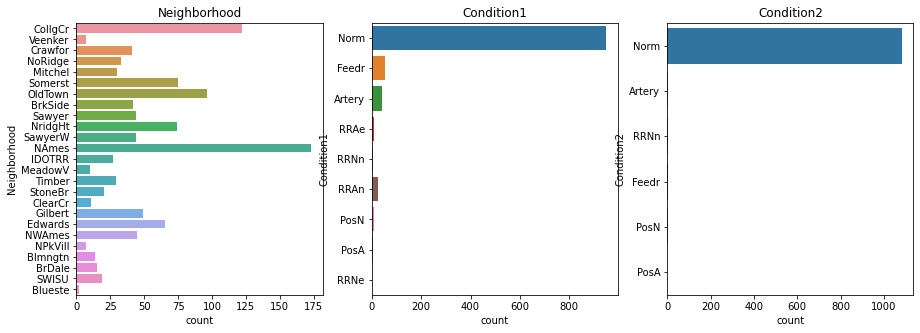

In [168]:
plt.figure(figsize=(15,5))
for i in range(6,9):
    plt.subplot(1, 3, i-5)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

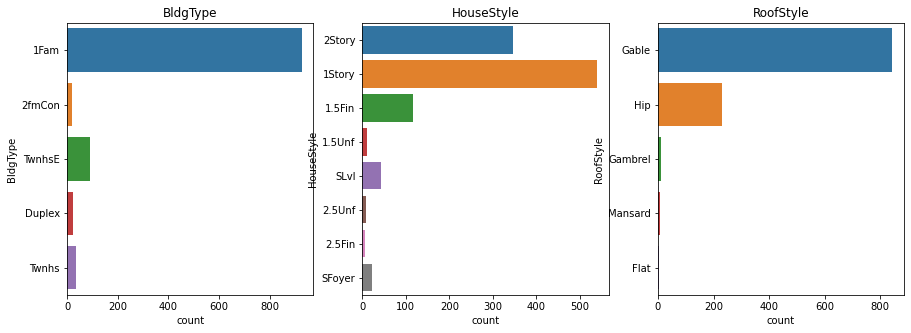

In [169]:
plt.figure(figsize=(15,5))
for i in range(9,12):
    plt.subplot(1, 3, i-8)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

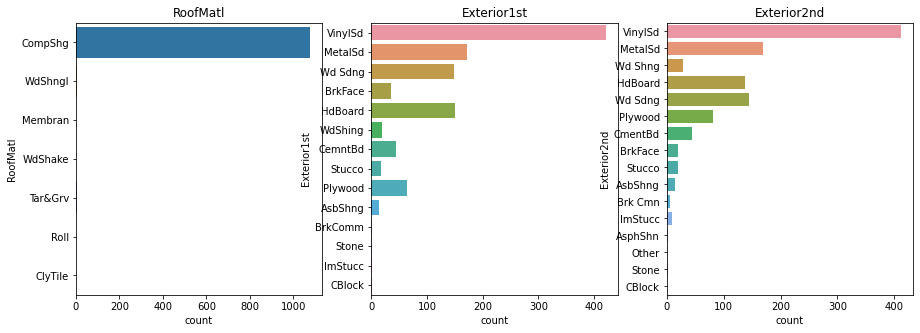

In [170]:
plt.figure(figsize=(15,5))
for i in range(12,15):
    plt.subplot(1, 3, i-11)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

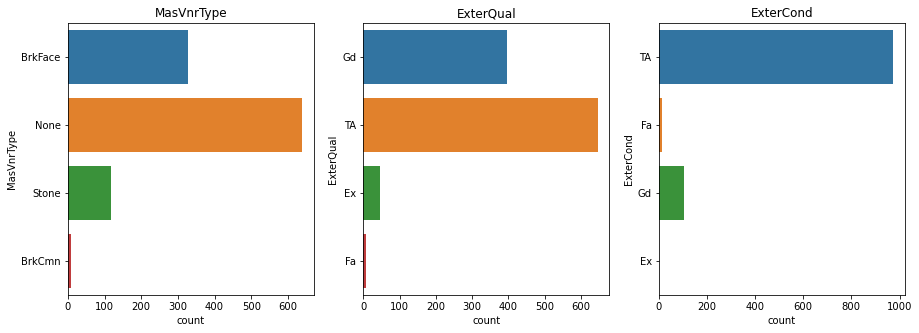

In [171]:
plt.figure(figsize=(15,5))
for i in range(15,18):
    plt.subplot(1, 3, i-14)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

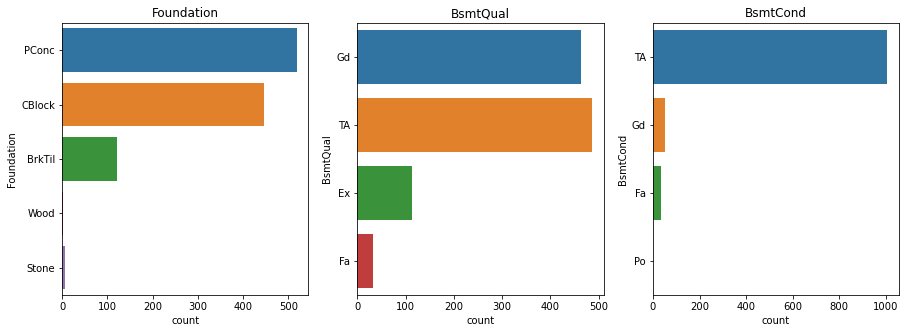

In [172]:
plt.figure(figsize=(15,5))
for i in range(18,21):
    plt.subplot(1, 3, i-17)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

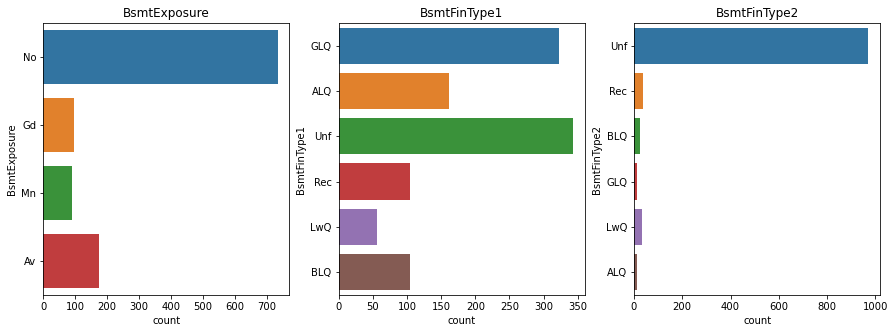

In [173]:
plt.figure(figsize=(15,5))
for i in range(21,24):
    plt.subplot(1, 3, i-20)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

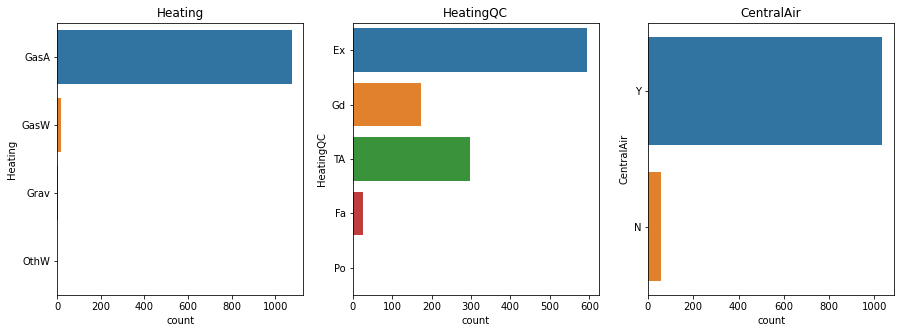

In [174]:
plt.figure(figsize=(15,5))
for i in range(24,27):
    plt.subplot(1, 3, i-23)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

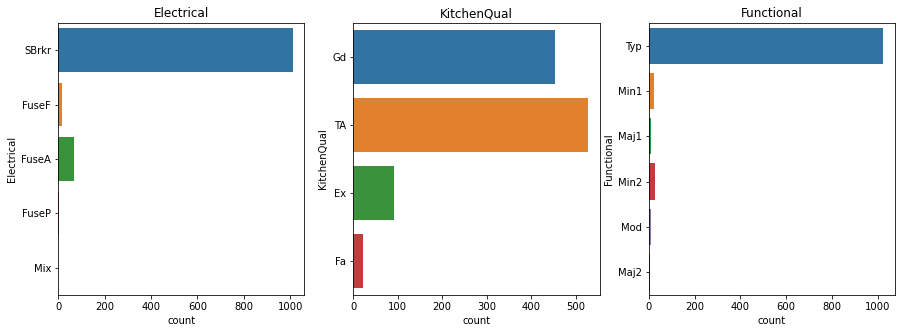

In [175]:
plt.figure(figsize=(15,5))
for i in range(27,30):
    plt.subplot(1, 3, i-26)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

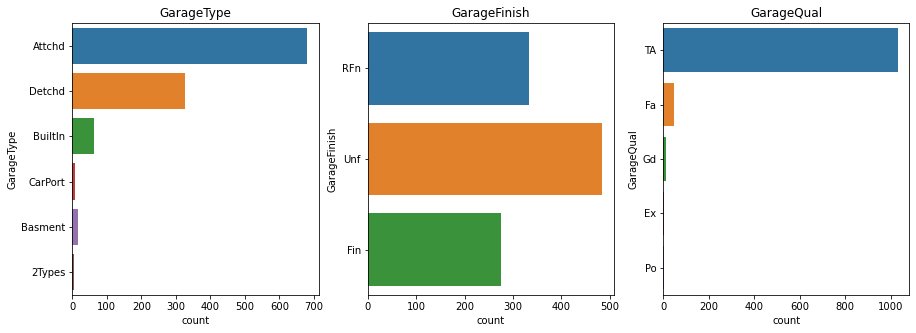

In [176]:
plt.figure(figsize=(15,5))
for i in range(30,33):
    plt.subplot(1, 3, i-29)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

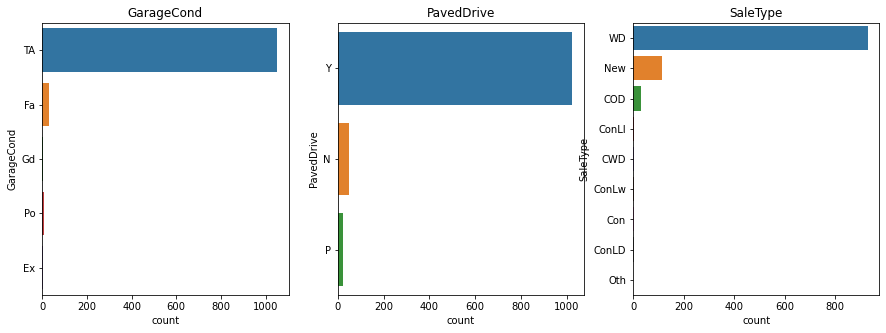

In [177]:
plt.figure(figsize=(15,5))
for i in range(33,36):
    plt.subplot(1, 3, i-32)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

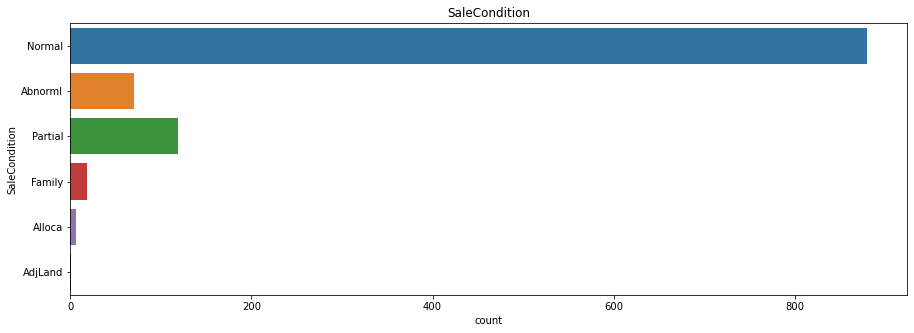

In [178]:
plt.figure(figsize=(15,5))
for i in range(36,37):
    plt.subplot(1, 1, i-35)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

# Bi-variate analysis with dependent variables

## Categorical and continious(dependent(SalsePrice))

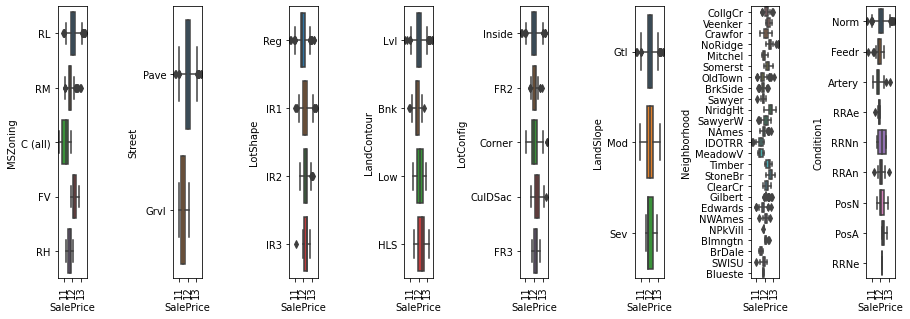

In [189]:
plt.figure(figsize=(15,5))
for i in range(0,8):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df_sales[df_cat.columns[i]],x=df_sales['SalePrice'],data=df_sales)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

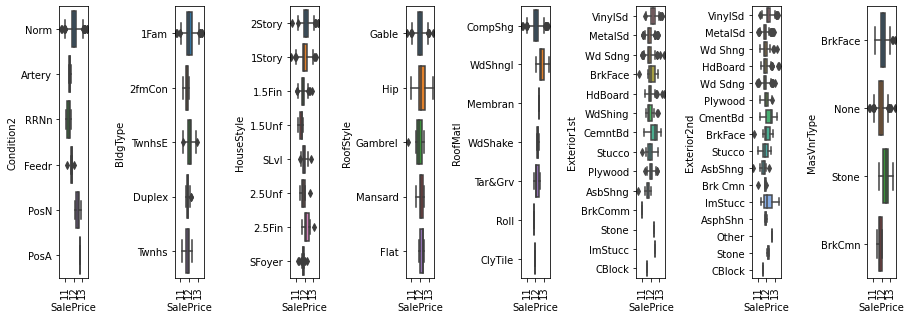

In [191]:
plt.figure(figsize=(15,5))
for i in range(8,16):
    plt.subplot(1, 8, i-7)
    sns.boxplot(y=df_sales[df_cat.columns[i]],x=df_sales['SalePrice'],data=df_sales)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

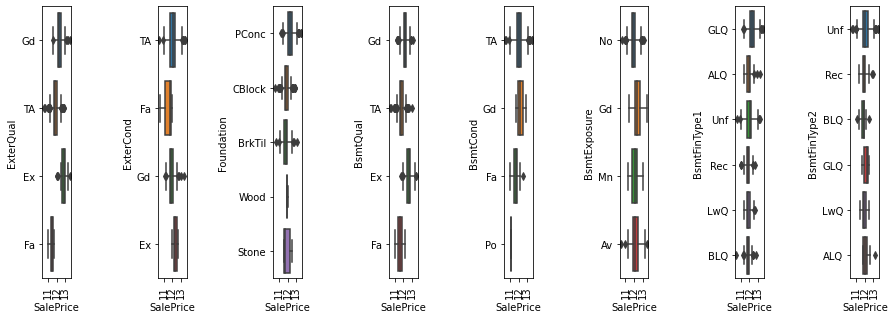

In [192]:
plt.figure(figsize=(15,5))
for i in range(16,24):
    plt.subplot(1, 8, i-15)
    sns.boxplot(y=df_sales[df_cat.columns[i]],x=df_sales['SalePrice'],data=df_sales)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

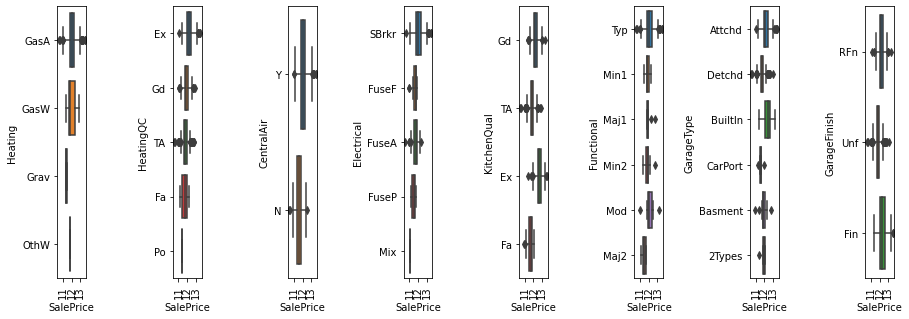

In [193]:
plt.figure(figsize=(15,5))
for i in range(24,32):
    plt.subplot(1, 8, i-23)
    sns.boxplot(y=df_sales[df_cat.columns[i]],x=df_sales['SalePrice'],data=df_sales)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

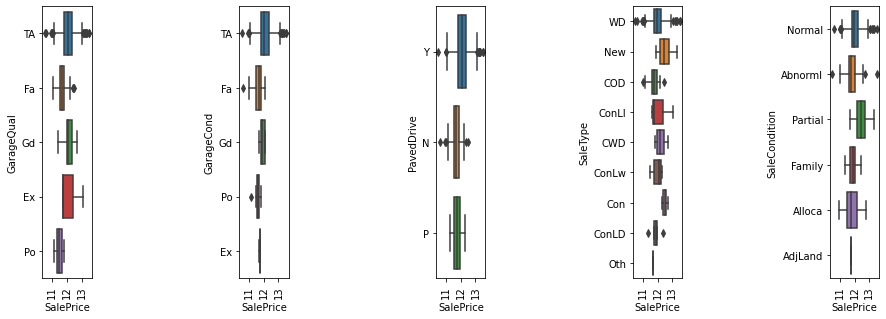

In [194]:
plt.figure(figsize=(15,5))
for i in range(32,37):
    plt.subplot(1, 5, i-31)
    sns.boxplot(y=df_sales[df_cat.columns[i]],x=df_sales['SalePrice'],data=df_sales)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)

# Bi variate with continious and continious

<Figure size 2304x1584 with 0 Axes>

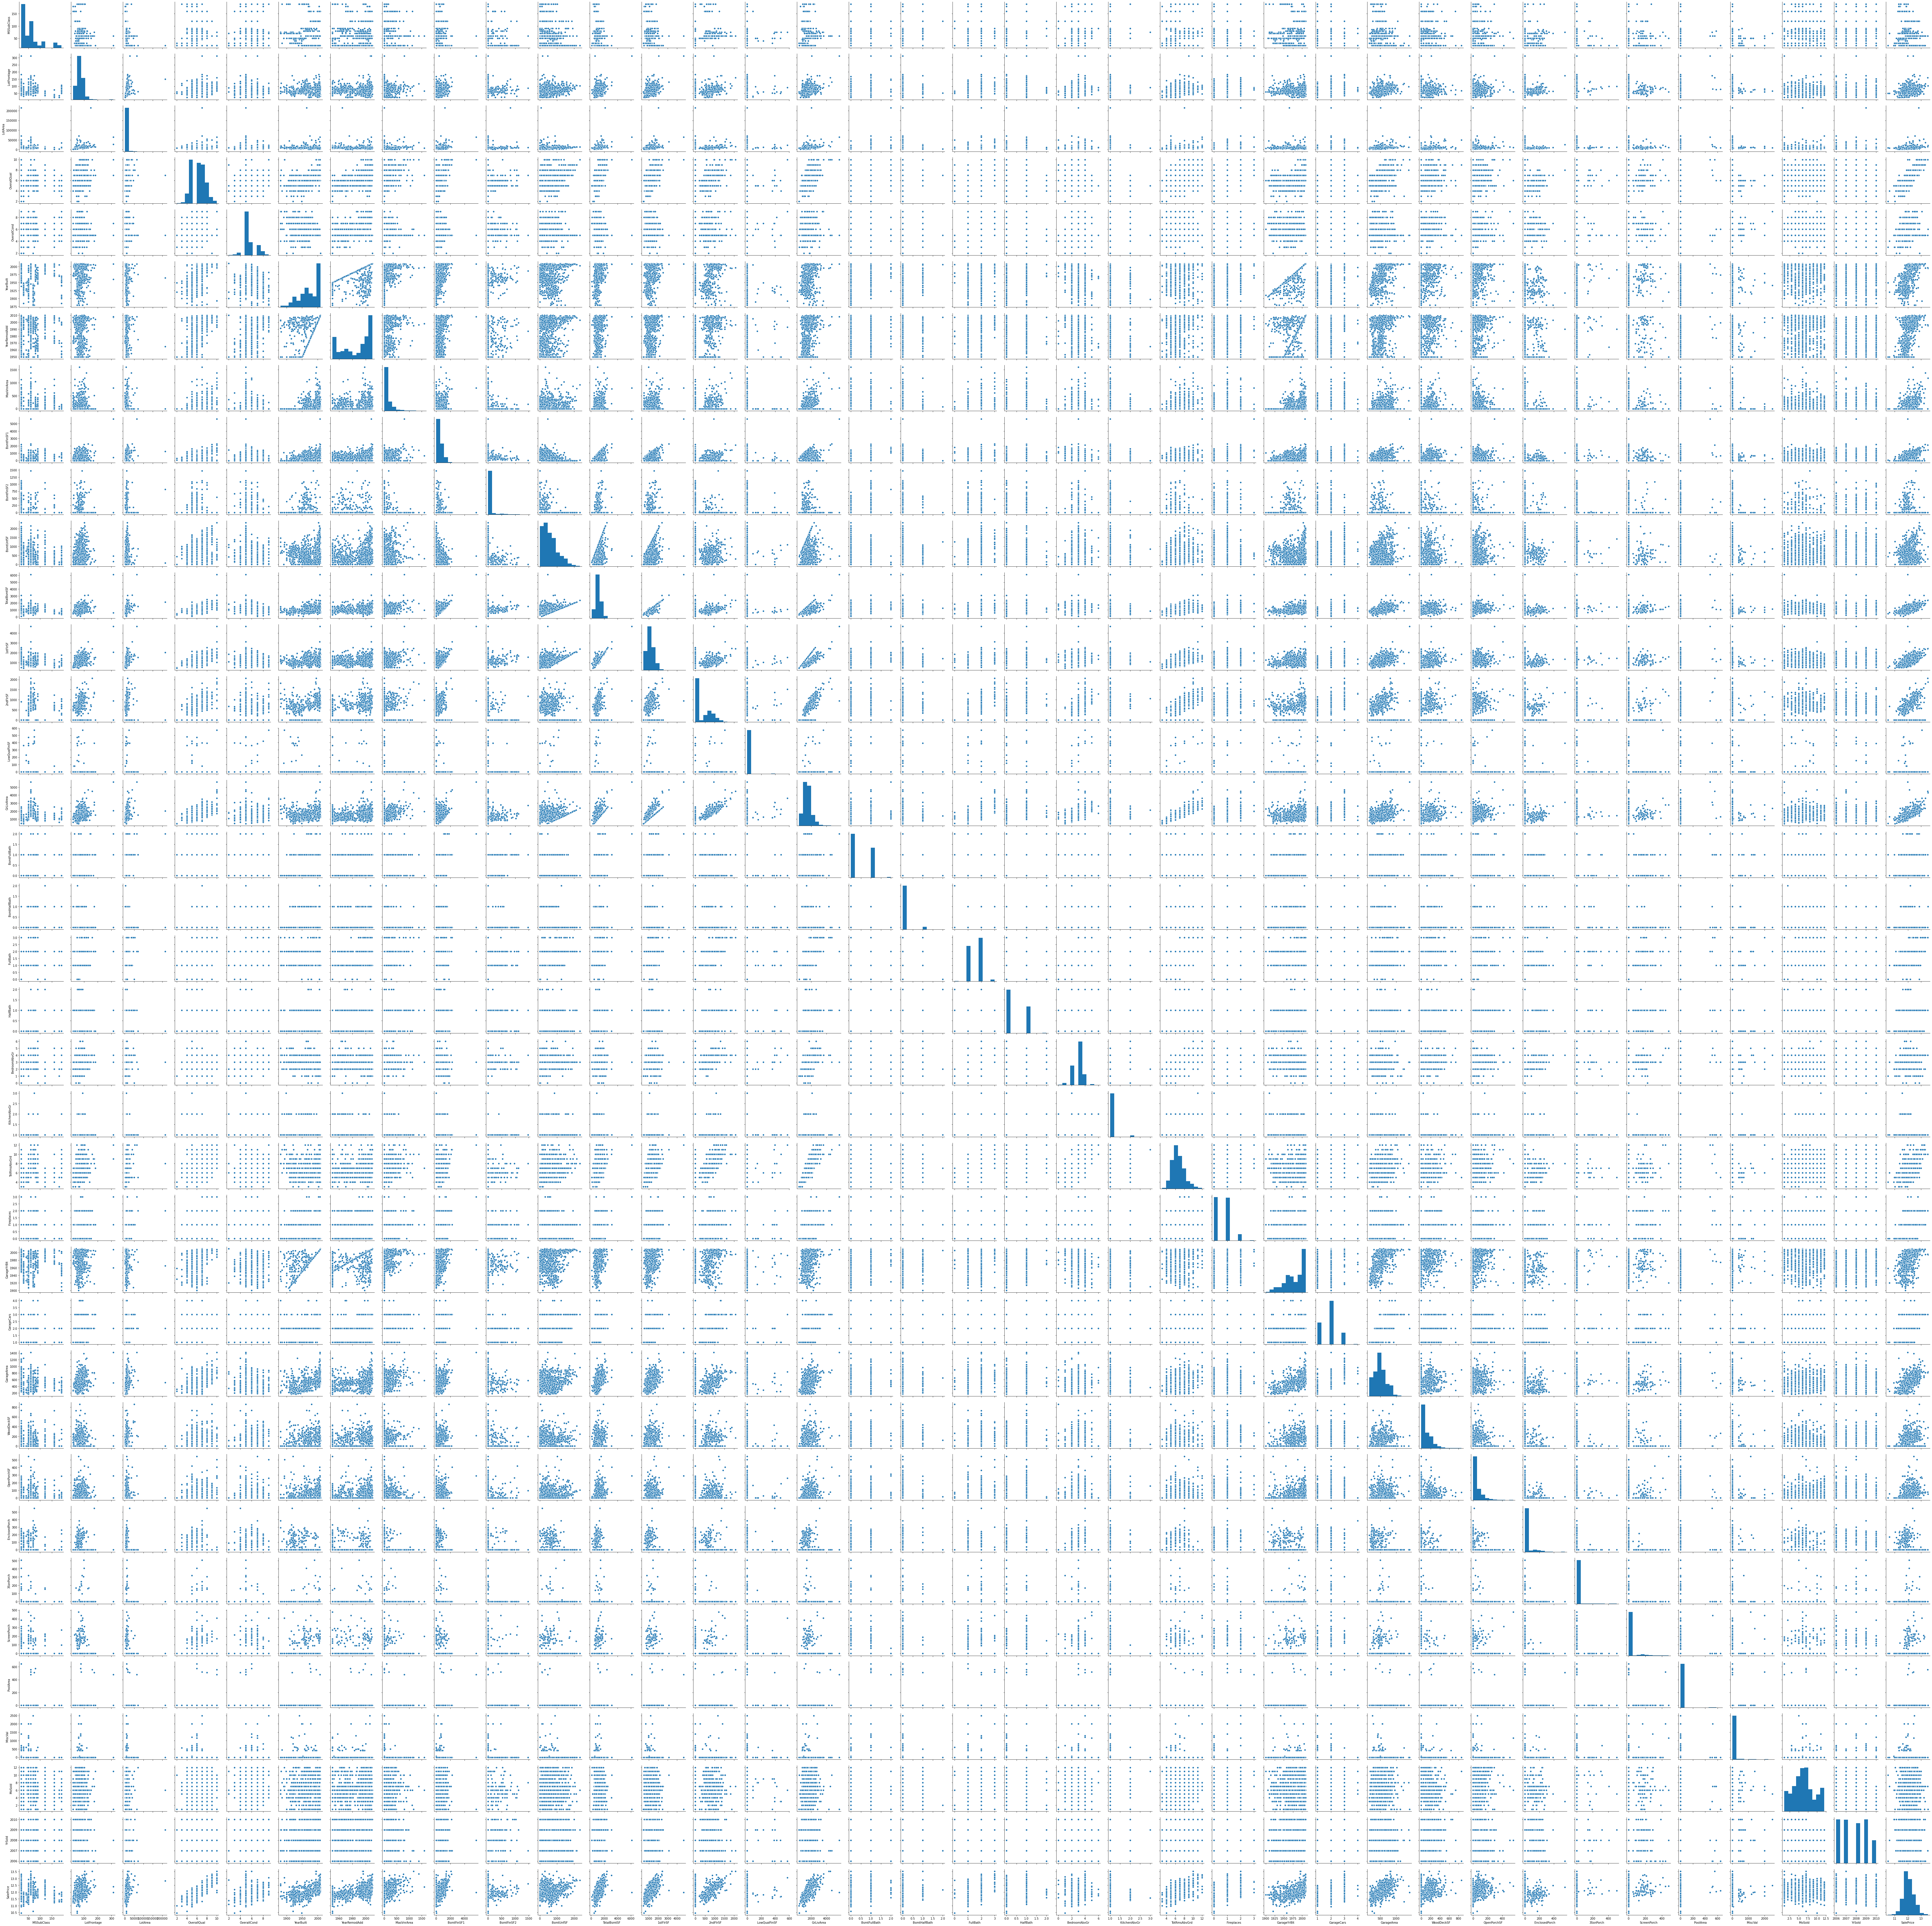

In [197]:
plt.figure(figsize=(32, 22))
sns.pairplot(df_cont)
plt.show()

In [198]:
df_cont.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.389466 -0.197903     0.031639    -0.085553   
LotFrontage     -0.389466     1.000000  0.419714     0.241169    -0.047132   
LotArea         -0.197903     0.419714  1.000000     0.169876    -0.033113   
OverallQual      0.031639     0.241169  0.169876     1.000000    -0.189587   
OverallCond     -0.085553    -0.047132 -0.033113    -0.189587     1.000000   
YearBuilt        0.021605     0.107958  0.028954     0.590761    -0.437647   
YearRemodAdd     0.010178     0.082938  0.024308     0.568582     0.024427   
MasVnrArea       0.040009     0.189769  0.106600     0.419756    -0.174581   
BsmtFinSF1      -0.069439     0.239734  0.232341     0.230438    -0.068285   
BsmtFinSF2      -0.073834     0.046928  0.138615    -0.081342     0.040598   
BsmtUnfSF       -0.147155     0.111368  0.008924     0.297384    -0.169743   
TotalBsmtSF     -0.264277     0.407566  0.324476     0.547448    -0.243419   
1stFlrSF        -0.258207     0.453035  0.331295     0.527908    -0.166191   
2ndFlrSF         0.319176     0.074953  0.075311     0.265906     0.004047   
LowQualFinSF     0.024935     0.010748  0.019956    -0.011186     0.047865   
GrLivArea        0.078213     0.397260  0.308590     0.610102    -0.115250   
BsmtFullBath    -0.013040     0.115151  0.179874     0.107138    -0.072778   
BsmtHalfBath     0.012509    -0.000491 -0.014597    -0.060775     0.121421   
FullBath         0.119495     0.189692  0.132860     0.597881    -0.225995   
HalfBath         0.206259     0.043414  0.043977     0.239893    -0.089625   
BedroomAbvGr    -0.044628     0.277136  0.141428     0.091462     0.012300   
KitchenAbvGr     0.258401     0.007411 -0.010855    -0.141071    -0.070660   
TotRmsAbvGrd     0.038180     0.354714  0.241849     0.465733    -0.093309   
Fireplaces      -0.029575     0.260293  0.255842     0.409725    -0.030731   
GarageYrBlt      0.051225     0.067254  0.012871     0.562405    -0.353291   
GarageCars      -0.031638     0.285748  0.173525     0.605466    -0.269616   
GarageArea      -0.095374     0.357030  0.213104     0.555315    -0.233585   
WoodDeckSF      -0.018514     0.081338  0.133995     0.273652    -0.018856   
OpenPorchSF      0.006799     0.160862  0.098051     0.335884    -0.084405   
EnclosedPorch   -0.019313     0.016058 -0.022789    -0.155080     0.067124   
3SsnPorch       -0.035855     0.073004  0.013343     0.020081    -0.010881   
ScreenPorch     -0.021854     0.034937  0.072413     0.049286     0.084416   
PoolArea         0.003221     0.211959  0.109294     0.080037    -0.024919   
MiscVal         -0.043299     0.000789  0.012483    -0.062944     0.121407   
MoSold          -0.025393     0.014951  0.006270     0.082995    -0.009661   
YrSold          -0.012347     0.013366 -0.006412    -0.003529     0.046775   
SalePrice       -0.086525     0.354647  0.285449     0.823472    -0.109006   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.021605      0.010178    0.040009   -0.069439   -0.073834   
LotFrontage     0.107958      0.082938    0.189769    0.239734    0.046928   
LotArea         0.028954      0.024308    0.106600    0.232341    0.138615   
OverallQual     0.590761      0.568582    0.419756    0.230438   -0.081342   
OverallCond    -0.437647      0.024427   -0.174581   -0.068285    0.040598   
YearBuilt       1.000000      0.625905    0.328897    0.234207   -0.058987   
YearRemodAdd    0.625905      1.000000    0.187492    0.111675   -0.063813   
MasVnrArea      0.328897      0.187492    1.000000    0.281356   -0.080799   
BsmtFinSF1      0.234207      0.111675    0.281356    1.000000   -0.046328   
BsmtFinSF2     -0.058987     -0.063813   -0.080799   -0.046328    1.000000   
BsmtUnfSF       0.170077      0.187505    0.100304   -0.550064   -0.239976   
TotalBsmtSF     0.423763      0.302488    0.393759    0.519707    0.073031   
1stFlrSF        0.311928      0.2865

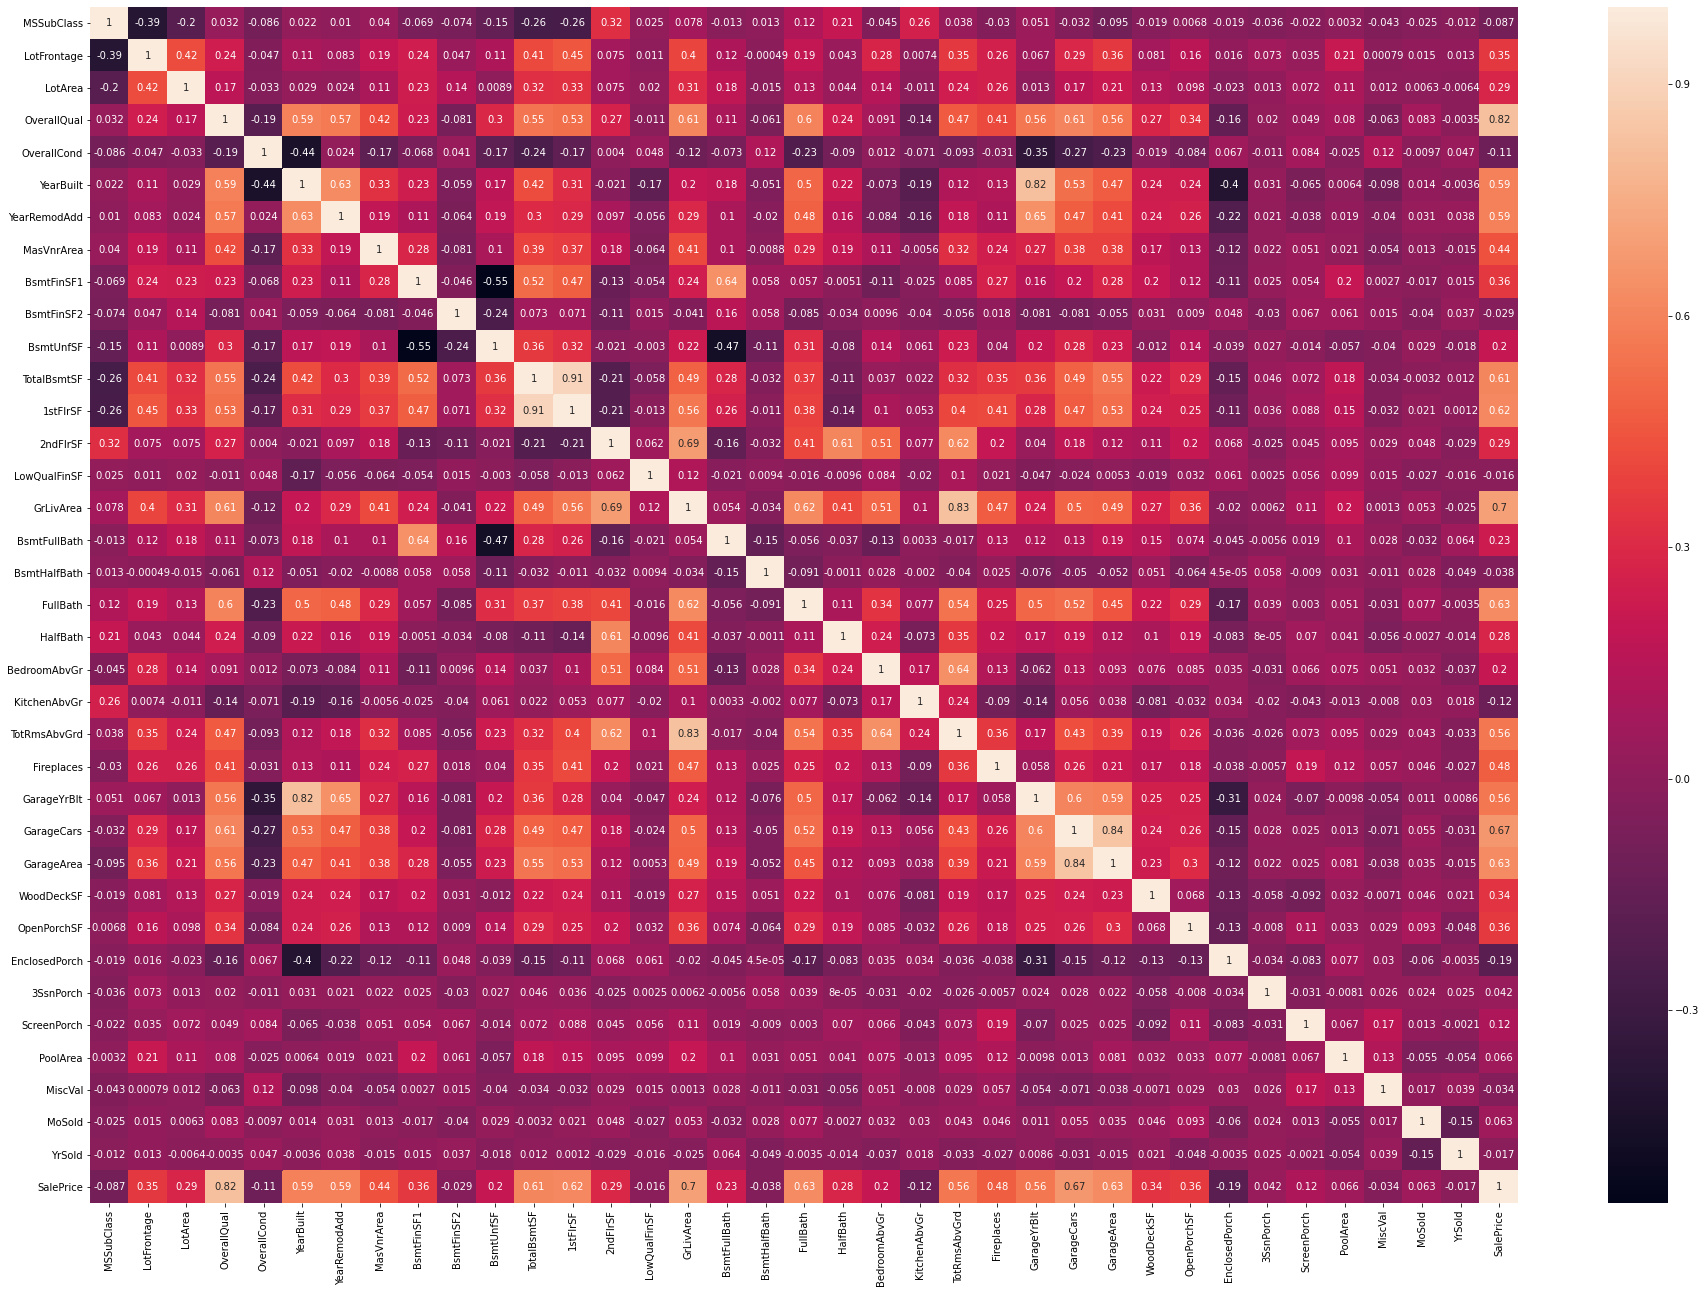

In [201]:
plt.figure(figsize=(32, 22))
sns.heatmap(df_cont.corr(),annot=True)

In [214]:
df_sales.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4    

In [217]:
df_sales[['YearBuilt','YearRemodAdd']].corr()

YearBuilt  YearRemodAdd
YearBuilt      1.000000      0.625905
YearRemodAdd   0.625905      1.000000

In [218]:
## We can drop 'YearRemodAdd' its highly co-related to YearBuilt
df_sales = df_sales.drop('YearRemodAdd',axis=1)

In [219]:
df_sales[['MoSold','YrSold']].corr()

MoSold    YrSold
MoSold  1.000000 -0.152046
YrSold -0.152046  1.000000

In [220]:
df_sales[['OverallQual','OverallCond']].corr()

OverallQual  OverallCond
OverallQual     1.000000    -0.189587
OverallCond    -0.189587     1.000000

In [224]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1094 non-null   int32
 1   Street         1094 non-null   int32
 2   LotShape       1094 non-null   int32
 3   LandContour    1094 non-null   int32
 4   LotConfig      1094 non-null   int32
 5   LandSlope      1094 non-null   int32
 6   Neighborhood   1094 non-null   int32
 7   Condition1     1094 non-null   int32
 8   Condition2     1094 non-null   int32
 9   BldgType       1094 non-null   int32
 10  HouseStyle     1094 non-null   int32
 11  RoofStyle      1094 non-null   int32
 12  RoofMatl       1094 non-null   int32
 13  Exterior1st    1094 non-null   int32
 14  Exterior2nd    1094 non-null   int32
 15  MasVnrType     1094 non-null   int32
 16  ExterQual      1094 non-null   int32
 17  ExterCond      1094 non-null   int32
 18  Foundation     1094 non-null   int32
 19  BsmtQu

In [225]:
df_cat.head()

MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0         3       1         3            3          4          0   
1         3       1         3            3          2          0   
2         3       1         0            3          4          0   
3         3       1         0            3          0          0   
4         3       1         0            3          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0             5           2           2         0           5          1   
1            24           1           2         0           2          1   
2             5           2           2         0           5          1   
3             6           2           2         0           5          1   
4            15           2           2         0           5          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         1           11           13           1          2          3   
1         1            7            8           2          3          3   
2         1           11           13           1          2          3   
3         1           12           15           2          3          3   
4         1           11           13           1          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           2         2         3             3             2             5   
1           1         2         3             1             0             5   
2           2         2         3             2             2             5   
3           0         3         1             3             0             5   
4           2         2         3             0             2             5   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        0          0           1           4            2           5   
1        0          0           1           4            3           5   
2        0          0           1           4            2           5   
3        0          2           1           4            2           5   
4        0          0           1           4            2           5   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           1             1           4           4           2         8   
1           1             1           4           4           2         8   
2           1             1           4           4           2         8   
3           5             2           4           4           2         8   
4           1             1           4           4           2         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4

In [227]:
df_sales = df_sales.drop(df_cat.columns,axis=1)
df_sales.shape

(1094, 36)

In [292]:
df_final = pd.concat([df_sales,df_cat],axis=1)
df_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
0  12.247694         3       1         3            3          4          0   
1  12.109011         3       1         3            3          2          0   
2  12.317167         3       1         0            3          4          0   
3  11.849398         3       1         0            3          0          0   
4  12.429216         3       1         0            3          2          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0             5           2           2         0           5          1   
1            24           1           2         0           2          1   
2             5           2           2         0           5          1   
3             6           2           2         0           5          1   
4            15           2           2         0           5          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         1           11           13           1          2          3   
1         1            7            8           2          3          3   
2         1           11           13           1          2          3   
3         1           12           15           2          3          3   
4         1           11  

In [293]:
df_final.shape

(1094, 73)

In [294]:
y = df_final.pop('SalePrice')
X = df_final

In [295]:
df_cont = df_final.select_dtypes('int64')

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [348]:
df_cont.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [349]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
290           60        120.0    15611            8            5       2006   
546           50         70.0     8737            6            7       1923   
891           60         70.0    11184            6            5       1978   
1393         190         60.0    10800            6            7       1905   
605           60         85.0    13600            7            6       1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
290          0.0           0           0       1079         1079      1079   
546          0.0         300           0        765         1065       915   
891         92.0         226         500        192          918       918   
1393         0.0           0           0        482          482      1221   
605        176.0         454           0        314          768      1186   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
290        840             0       1919             0             0         2   
546        720             0       1635             0             0         1   
891        765             0       1683             0             0         2   
1393       691             0       1912             0             0         2   
605        800             0       1986             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
290          1             3             1             8           1   
546          1             3             1             6           1   
891          1             3             1             7           1   
1393         0             3             2             7           1   
605          1             3             1             7           3   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
290        2006.0           2         685           0           51   
546        1950.0           2         440           0           38   
891        1978.0           2         440         243            0   
1393       2003.0           2         672           0           25   
605        1965.0           2         486           0           42   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
290               0          0            0         0        0       7   
546               0        144            0         0        0       5   
891               0          0            0         0        0       7   
1393            212          0            0         0        0       4   
605               0          0          189         0        0      10   

      YrSold  MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
290     2006         3       1         3            3          4          0   
546     2007         3       1         0            0          4          0   
891     2009         3       1         3            3          4          0   
1393    2008         4       1         3            3          4          0   
605     2009         3       1         3            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
290              5           2           2         0           5          1   
546              3           2           2         0           0          1   
891             19           2           2         0           5          3   
1393            17           2           2         1           0          1   
605             12           2           2         0           5          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
290          1           11           13           2          2          3   
546          1            2           14           2          3          3   
891          1            5            6           1          3          3   
1393         1

In [350]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
202           50         50.0     7000            6            6       1924   
1125          20         60.0    10434            4            5       1955   
219          120         43.0     3010            7            5       2005   
1333          50         60.0     7200            5            6       1938   
400          120         38.0    14963            8            5       1996   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
202          0.0         617           0          0          617       865   
1125         0.0           0           0       1005         1005      1005   
219         16.0          16           0       1232         1248      1248   
1333         0.0           0           0        803          803       803   
400          0.0         786           0        474         1260      1288   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
202        445             0       1310             0             0         2   
1125         0             0       1005             0             0         1   
219          0             0       1248             0             0         2   
1333       557             0       1360             0             0         1   
400          0             0       1288             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
202          0             2             1             6           0   
1125         0             2             1             5           1   
219          0             2             1             5           0   
1333         1             2             1             6           0   
400          1             1             1             4           2   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
202        1924.0           1         398           0            0   
1125       1977.0           2         672           0            0   
219        2005.0           2         438         108            0   
1333       1951.0           1         297           0           65   
400        1996.0           2         500         120           30   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
202             126          0            0         0        0       5   
1125              0          0            0         0        0      11   
219               0          0            0         0        0       3   
1333            190          0            0         0        0       7   
400               0          0          224         0        0      12   

      YrSold  MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
202     2006         3       1         3            3          0          0   
1125    2009         3       1         3            3          4          0   
219     2006         3       1         3            3          4          0   
1333    2006         4       1         3            3          0          0   
400     2008         3       1         1            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
202             17           0           2         0           0          1   
1125            12           2           2         0           2          1   
219              0           2           2         4           2          1   
1333             9           2           2         0           0          1   
400             24           2           2         4           2          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
202          1            7            8           2          3          2   
1125         1            8           10           2          3          3   
219          1           11           13           1          2          3   
1333         1

In [351]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train[df_cont.columns] = scale.fit_transform(X_train[df_cont.columns])


In [352]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
290     0.121017        120.0  0.609448     1.318187    -0.532097   1.087411   
546    -0.122610         70.0 -0.167042    -0.186907     1.339416  -1.613781   
891     0.121017         70.0  0.109372    -0.186907    -0.532097   0.176166   
1393    3.288169         60.0  0.065995    -0.186907     1.339416  -2.199582   
605     0.121017         85.0  0.382284     0.565640     0.403660  -0.246913   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
290          0.0   -0.945855   -0.301960   1.062451    -0.061539 -0.262525   
546          0.0   -0.311937   -0.301960   0.357009    -0.094691 -0.686144   
891         92.0   -0.468304    2.642656  -0.930311    -0.442783 -0.678395   
1393         0.0   -0.945855   -0.301960  -0.278788    -1.475220  0.104267   
605        176.0    0.013474   -0.301960  -0.656222    -0.797979  0.013861   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
290   1.114796     -0.084837   0.735995     -0.822253     -0.241021  0.797801   
546   0.839549     -0.084837   0.188062     -0.822253     -0.241021 -1.080100   
891   0.942767     -0.084837   0.280670     -0.822253     -0.241021  0.797801   
1393  0.773031     -0.084837   0.722490     -0.822253     -0.241021  0.797801   
605   1.023047     -0.084837   0.865262     -0.822253     -0.241021  0.797801   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
290   1.199147      0.173366     -0.188068      0.940870    0.599322   
546   1.199147      0.173366     -0.188068     -0.372571    0.599322   
891   1.199147      0.173366     -0.188068      0.284150    0.599322   
1393 -0.790761      0.173366      4.950212      0.284150    0.599322   
605   1.199147      0.173366     -0.188068      0.284150    3.761262   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
290        2006.0    0.185673    0.937508   -0.788975     0.047076   
546        1950.0    0.185673   -0.338471   -0.788975    -0.149716   
891        1978.0    0.185673   -0.338471    1.310700    -0.724955   
1393       2003.0    0.185673    0.869803   -0.788975    -0.346509   
605        1965.0    0.185673   -0.098899   -0.788975    -0.089165   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
290       -0.364286  -0.110243    -0.298182 -0.072094 -0.139721  0.252514   
546       -0.364286   4.712782    -0.298182 -0.072094 -0.139721 -0.494771   
891       -0.364286  -0.110243    -0.298182 -0.072094 -0.139721  0.252514   
1393       3.277904  -0.110243    -0.298182 -0.072094 -0.139721 -0.868413   
605       -0.364286  -0.110243     2.885442 -0.072094 -0.139721  1.373441   

        YrSold  MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
290  -1.360259         3       1         3            3          4          0   
546  -0.611088         3       1         0            0          4          0   
891   0.887253         3       1         3            3          4          0   
1393  0.138082         4       1         3            3          4          0   
605   0.887253         3       1         3            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
290              5           2           2         0           5          1   
546              3           2           2         0           0          1   
891             19           2           2         0           5          3   
1393            17           2           2         1           0          1   
605             12           2           2         0           5          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
290          1           11           13           2          2          3   
546          1            2           14           2          3          3   
891          1            5            6           1    

In [353]:
X_test[df_cont.columns] = scale.transform(X_test[df_cont.columns])

In [354]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
202    -0.122610         50.0 -0.363255    -0.186907     0.403660  -1.581237   
1125   -0.853491         60.0  0.024652    -1.692001    -0.532097  -0.572358   
219     1.582779         43.0 -0.813967     0.565640    -0.532097   1.054867   
1333   -0.122610         60.0 -0.340663    -0.939454     0.403660  -1.125614   
400     1.582779         38.0  0.536249     1.318187    -0.532097   0.761967   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
202          0.0    0.357903    -0.30196  -1.361664    -1.155543 -0.815297   
1125         0.0   -0.945855    -0.30196   0.896200    -0.236769 -0.453670   
219         16.0   -0.912046    -0.30196   1.406185     0.338648  0.174009   
1333         0.0   -0.945855    -0.30196   0.442381    -0.715100 -0.975445   
400          0.0    0.715010    -0.30196  -0.296761     0.367064  0.277331   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
202   0.208774     -0.084837  -0.438975     -0.822253     -0.241021  0.797801   
1125 -0.811934     -0.084837  -1.027425     -0.822253     -0.241021 -1.080100   
219  -0.811934     -0.084837  -0.558594     -0.822253     -0.241021  0.797801   
1333  0.465671     -0.084837  -0.342508     -0.822253     -0.241021 -1.080100   
400  -0.811934     -0.084837  -0.481420      1.131236     -0.241021 -1.080100   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
202  -0.790761     -1.139750     -0.188068     -0.372571   -0.981648   
1125 -0.790761     -1.139750     -0.188068     -1.029291    0.599322   
219  -0.790761     -1.139750     -0.188068     -1.029291   -0.981648   
1333  1.199147     -1.139750     -0.188068     -0.372571   -0.981648   
400   1.199147     -2.452866     -0.188068     -1.686011    2.180292   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
202        1924.0   -1.358236   -0.557210   -0.788975    -0.724955   
1125       1977.0    0.185673    0.869803   -0.788975    -0.724955   
219        2005.0    0.185673   -0.348887    0.144214    -0.724955   
1333       1951.0   -1.358236   -1.083226   -0.788975     0.259006   
400        1996.0    0.185673   -0.025986    0.247901    -0.270819   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
202        1.800412  -0.110243    -0.298182 -0.072094 -0.139721 -0.494771   
1125      -0.364286  -0.110243    -0.298182 -0.072094 -0.139721  1.747084   
219       -0.364286  -0.110243    -0.298182 -0.072094 -0.139721 -1.242056   
1333       2.899941  -0.110243    -0.298182 -0.072094 -0.139721  0.252514   
400       -0.364286  -0.110243     3.475002 -0.072094 -0.139721  2.120726   

        YrSold  MSZoning  Street  LotShape  LandContour  LotConfig  LandSlope  \
202  -1.360259         3       1         3            3          0          0   
1125  0.887253         3       1         3            3          4          0   
219  -1.360259         3       1         3            3          4          0   
1333 -1.360259         4       1         3            3          0          0   
400   0.138082         3       1         1            3          4          0   

      Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
202             17           0           2         0           0          1   
1125            12           2           2         0           2          1   
219              0           2           2         4           2          1   
1333             9           2           2         0           0          1   
400             24           2           2         4           2          1   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
202          1            7            8           2          3          2   
1125         1            8           10           2          3          3   
219          1           11           13           1    

In [355]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [434]:

ridge = Ridge()
from sklearn.feature_selection import RFE
rfe = RFE(ridge, 40)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [435]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 29),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 32),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 27),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 28),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 14),
 ('FullBath', True, 1),
 ('HalfBath', False, 10),
 ('BedroomAbvGr', False, 18),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 31),
 ('GarageCars', True, 1),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 12),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 26),
 ('MoSold', False, 6),
 ('YrSold', True, 1),
 ('MSZoning', True, 1),
 ('Street', True, 1),
 ('LotShape', True, 1),
 (

In [436]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LandSlope',
       'Condition1', 'Condition2', 'RoofStyle', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'KitchenQual',
       'Functional', 'GarageFinish', 'PavedDrive', 'SaleCondition'],
      dtype='object')

# Ridge

In [437]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}


ridge = Ridge()

# cross validation
folds = 9
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train)

Fitting 9 folds for each of 27 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    1.9s finished


GridSearchCV(cv=9, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [438]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(9)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002687      0.001462         0.001379        0.001208      0.0001   
1       0.003304      0.001378         0.001306        0.001065       0.001   
2       0.003861      0.001670         0.002398        0.001918        0.01   
3       0.003262      0.002132         0.000606        0.000441        0.05   
4       0.002844      0.002112         0.001089        0.001691         0.1   
5       0.003397      0.001101         0.000937        0.000790         0.2   
6       0.002893      0.001986         0.001115        0.001197         0.3   
7       0.002072      0.001853         0.001847        0.001775         0.4   
8       0.003357      0.002190         0.000622        0.000585         0.5   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.113582          -0.095482          -0.090975   
1   {'alpha': 0.001}          -0.113583          -0.095482          -0.090975   
2    {'alpha': 0.01}          -0.113589          -0.095487          -0.090971   
3    {'alpha': 0.05}          -0.113618          -0.095512          -0.090952   
4     {'alpha': 0.1}          -0.113652          -0.095544          -0.090929   
5     {'alpha': 0.2}          -0.113718          -0.095604          -0.090886   
6     {'alpha': 0.3}          -0.113779          -0.095657          -0.090844   
7     {'alpha': 0.4}          -0.113837          -0.095705          -0.090805   
8     {'alpha': 0.5}          -0.113890          -0.095749          -0.090770   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.085975          -0.103463          -0.086291          -0.139965   
1          -0.085974          -0.103463          -0.086291          -0.139947   
2          -0.085969          -0.103464          -0.086293          -0.139768   
3          -0.085944          -0.103469          -0.086298          -0.139015   
4          -0.085914          -0.103475          -0.086302          -0.138162   
5          -0.085858          -0.103484          -0.086318          -0.136703   
6          -0.085806          -0.103491          -0.086335          -0.135504   
7          -0.085757          -0.103497          -0.086350          -0.134495   
8          -0.085711          -0.103501          -0.086363          -0.133634   

   split7_test_score  split8_test_score  mean_test_score  std_test_score  \
0          -0.093483          -0.107926        -0.101905        0.016169   
1          -0.093482          -0.107926        -0.101903        0.016164   
2          -0.093482          -0.107934        -0.101884        0.016119   
3          -0.093478          -0.107967        -0.101806        0.015929   
4          -0.093474          -0.108005        -0.101718        0.015717   
5          -0.093464          -0.108075        -0.101568        0.015358   
6          -0.093453          -0.108137        -0.101445        0.015069   
7          -0.093441          -0.108192        -0.101342        0.014831   
8          -0.093429          -0.108242        -0.101254        0.014632   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.089804           -0.093673   
1               25           -0.089803           -0.093673   
2               24           -0.089802           -0.093674   
3               23           -0.089797           -0.093675   
4               22           -0.089790           -0.093676   
5               21           -0.089782           -0.093678   
6               20           -0.089775           -0.093681   
7               19           -0.089769           -0.093683   
8               18           -0.089763           -0.093685   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.093043           -0.093733           -0.092710   
1           -0.093043           -0.093733           -0.092710   
2           -

In [439]:
model_cv.best_params_

{'alpha': 100}

In [440]:
model_cv.best_score_

-0.09923291586960044

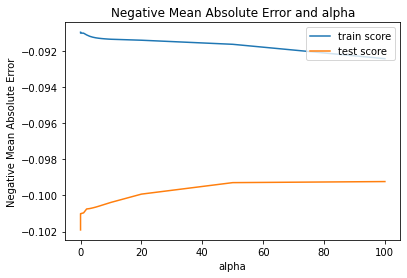

In [441]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [449]:
ridge = Ridge(alpha=100)
ridge.fit(X_train[col], y_train)
ridge.coef_

array([-0.01962893,  0.01317509,  0.08656595,  0.03628768,  0.04075158,
        0.00189802, -0.00413929,  0.00539885,  0.04066655,  0.03175173,
        0.05736604,  0.02445288,  0.0251715 , -0.01567873,  0.02601734,
        0.02098668,  0.04451401,  0.00762223,  0.02087956, -0.0195523 ,
       -0.00753181, -0.01756375,  0.00886199, -0.0110545 ,  0.0148834 ,
        0.00537385,  0.00844822, -0.00411279,  0.00792588,  0.00587827,
       -0.02713783,  0.01608513, -0.01555452, -0.00926486, -0.01723191,
       -0.02707442,  0.02315577, -0.0204183 ,  0.01919432,  0.02334901])

In [450]:
ridge = Ridge(alpha=200)
ridge.fit(X_train[col], y_train)
ridge.coef_

array([-0.01609489,  0.01312876,  0.07632101,  0.03140425,  0.03751296,
        0.00693661, -0.00121248,  0.01179297,  0.03429209,  0.02988564,
        0.05115623,  0.02115734,  0.02748963, -0.01669566,  0.02959999,
        0.02240696,  0.04330055,  0.00695545,  0.01969923, -0.01684988,
       -0.00617335, -0.01528561,  0.00462514, -0.01228161,  0.01252688,
        0.00284717,  0.00806457, -0.00189306,  0.00792194,  0.00381147,
       -0.02679417,  0.01360504, -0.01551263, -0.0059029 , -0.01975001,
       -0.02757034,  0.02014601, -0.02152996,  0.01555687,  0.02252559])

# Lasso


In [443]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 9 folds for each of 27 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    2.8s finished


GridSearchCV(cv=9, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [444]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(9)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.023242      0.009455         0.001265        0.001693      0.0001   
1       0.014522      0.003837         0.002106        0.001802       0.001   
2       0.008330      0.002305         0.002673        0.002491        0.01   
3       0.005705      0.001861         0.001890        0.001689        0.05   
4       0.005604      0.002385         0.002367        0.001943         0.1   
5       0.004685      0.001655         0.001522        0.001335         0.2   
6       0.005658      0.001308         0.001551        0.001662         0.3   
7       0.004894      0.002282         0.001628        0.001243         0.4   
8       0.004717      0.002284         0.002322        0.000929         0.5   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.113630          -0.095256          -0.090762   
1   {'alpha': 0.001}          -0.115224          -0.093703          -0.090059   
2    {'alpha': 0.01}          -0.116061          -0.089816          -0.097441   
3    {'alpha': 0.05}          -0.137101          -0.113989          -0.125896   
4     {'alpha': 0.1}          -0.162150          -0.141414          -0.153162   
5     {'alpha': 0.2}          -0.217039          -0.199637          -0.219003   
6     {'alpha': 0.3}          -0.271466          -0.258583          -0.289966   
7     {'alpha': 0.4}          -0.288510          -0.275533          -0.302001   
8     {'alpha': 0.5}          -0.288510          -0.275533          -0.302001   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.085704          -0.103236          -0.086389          -0.138238   
1          -0.084053          -0.100972          -0.087934          -0.129922   
2          -0.092258          -0.098174          -0.093341          -0.134328   
3          -0.126700          -0.124231          -0.121067          -0.162512   
4          -0.158222          -0.155758          -0.160596          -0.185543   
5          -0.213701          -0.225399          -0.232820          -0.251062   
6          -0.278519          -0.289615          -0.300815          -0.325777   
7          -0.293410          -0.299986          -0.309340          -0.334393   
8          -0.293410          -0.299986          -0.309340          -0.334393   

   split7_test_score  split8_test_score  mean_test_score  std_test_score  \
0          -0.093354          -0.108378        -0.101661        0.015795   
1          -0.090322          -0.108902        -0.100121        0.014295   
2          -0.090423          -0.109610        -0.102384        0.014092   
3          -0.128683          -0.136695        -0.130764        0.013106   
4          -0.162375          -0.172887        -0.161345        0.011672   
5          -0.234364          -0.238914        -0.225771        0.014479   
6          -0.302593          -0.302979        -0.291146        0.018781   
7          -0.318773          -0.314960        -0.304101        0.016577   
8          -0.318773          -0.314960        -0.304101        0.016577   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.089691           -0.093594   
1                1           -0.089881           -0.093783   
2                3           -0.095131           -0.099303   
3                4           -0.126627           -0.130952   
4                5           -0.158067           -0.161204   
5                6           -0.223388           -0.223346   
6                7           -0.288083           -0.289717   
7                8           -0.306258           -0.307164   
8                8           -0.306258           -0.307164   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.092959           -0.093634           -0.092650   
1           -0.093111           -0.093800           -0.093053   
2           -

In [445]:
model_cv.best_params_

{'alpha': 0.001}

In [446]:
model_cv.best_score_

-0.10012123346264415

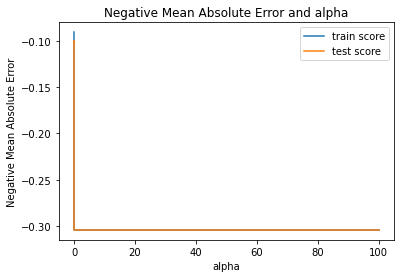

In [447]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [448]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train[col], y_train)
lasso.coef_

array([-0.02578811,  0.01319283,  0.10419445,  0.04170809,  0.04983504,
       -0.        , -0.00313779, -0.01503165,  0.02604528,  0.        ,
        0.11537199,  0.02861676,  0.01776412, -0.00997337,  0.01185157,
        0.01719676,  0.04390824,  0.00693845,  0.02127272, -0.02267229,
       -0.00816309, -0.01936249,  0.03418282, -0.00893124,  0.01586099,
        0.0014772 ,  0.00835831, -0.        ,  0.00652339,  0.00773662,
       -0.02635179,  0.01742462, -0.01550653, -0.00580228, -0.01376216,
       -0.02350829,  0.02649201, -0.01713128,  0.02109864,  0.02374639])

In [451]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train[col], y_train)
lasso.coef_

array([-0.02455571,  0.01192015,  0.10543442,  0.04214377,  0.05010204,
       -0.        , -0.00395669, -0.        ,  0.01459882,  0.        ,
        0.11353788,  0.02665374,  0.01731928, -0.00980977,  0.01303196,
        0.0172841 ,  0.04369154,  0.00589472,  0.02025559, -0.02206143,
       -0.00639915, -0.01671185,  0.        , -0.0091044 ,  0.01325579,
        0.        ,  0.00747302, -0.        ,  0.0045793 ,  0.00327542,
       -0.02528979,  0.01434097, -0.01574401, -0.        , -0.01437736,
       -0.02217348,  0.0230773 , -0.01707169,  0.01631867,  0.02307773])